In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [3]:
path = './data.csv'
cancerData = pd.read_csv(path)
cancerData = cancerData.drop(1733)

## Recurrence Rate

In [4]:
temp = cancerData['是否复发（是1 否0）'].fillna(0)
rate = sum(temp)/(len(temp))
rate

0.5626081938834391

In [5]:
# early recurrence
temp = cancerData['是否为早期复发'].fillna(0)
rate = sum(temp)/len(temp)
rate

0.44143104443162146

# Grouping Non-Numeric Data Value

In [6]:
textIdx = cancerData['严重并发症']!='0'
cancerData['严重并发症'][textIdx] = 1
cancerData.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,性别（1男0女）,年龄,肿瘤大小a（cm）,肿瘤大小b（cm）,肿瘤大小c（cm）,肿瘤数量,肝硬化类型（0无乙肝1丙肝2酒精3其他4）,肝外转移（无0有1）,Child分级,...,术前低密度脂蛋白,消融时间（s）,功率（W）,酒精消融（有1无0）,并发症（有1无0）,严重并发症,完全消融（是1否0）,是否复发（是1 否0）,随访时间(单位：月),是否为早期复发
0,1.0,1,39,2.5,2.2,NaN,3.0,1.0,0.0,A,...,NaN,1020.0,50.0,0.0,0.0,0,1.0,1.0,33.80,0.0
1,2.0,1,58,4.0,2.3,NaN,2.0,1.0,0.0,A,...,1.84,840.0,50.0,1.0,1.0,0,1.0,1.0,20.00,1.0
2,3.0,1,47,2.5,2.1,NaN,4.0,0.0,1.0,A,...,NaN,480.0,50.0,0.0,0.0,0,1.0,1.0,2.57,1.0
3,4.0,1,53,3.4,3.2,NaN,28.0,0.0,0.0,A,...,NaN,660.0,50.0,0.0,1.0,0,1.0,1.0,2.33,1.0
4,5.0,0,46,3.6,2.9,NaN,1.0,1.0,0.0,B,...,NaN,780.0,50.0,1.0,1.0,0,1.0,0.0,100.97,0.0
5,6.0,1,53,2.4,2.1,NaN,1.0,1.0,0.0,B,...,NaN,510.0,50.0,0.0,0.0,0,1.0,1.0,61.90,0.0
6,7.0,1,65,6.2,3.9,NaN,1.0,1.0,0.0,B,...,NaN,2250.0,60.0,1.0,1.0,1,1.0,1.0,5.37,1.0
7,8.0,1,58,3.5,3.0,NaN,1.0,1.0,0.0,A,...,NaN,870.0,50.0,0.0,0.0,0,1.0,1.0,0.87,1.0
8,9.0,1,39,1.9,1.8,NaN,3.0,0.0,0.0,A,...,NaN,690.0,40.0,1.0,0.0,0,1.0,1.0,10.43,1.0
9,10.0,1,39,1.9,1.9,NaN,2.0,1.0,0.0,A,...,NaN,420.0,0.0,1.0,0.0,0,1.0,1.0,65.93,0.0


In [7]:
cancerData['Child分级'][cancerData['Child分级']=='A'] = 0
cancerData['Child分级'][cancerData['Child分级']=='B'] = 1
cancerData['Child分级'][cancerData['Child分级']=='C'] = 2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [8]:
cancerData = cancerData.apply(pd.to_numeric,errors = 'coerce')
cancerData.dtypes

ID                       float64
性别（1男0女）                   int64
年龄                       float64
肿瘤大小a（cm）                float64
肿瘤大小b（cm）                float64
肿瘤大小c（cm）                float64
肿瘤数量                     float64
肝硬化类型（0无乙肝1丙肝2酒精3其他4）    float64
肝外转移（无0有1）               float64
Child分级                  float64
病理（高分化0中1低2无3）           float64
腹水（无0有1）                 float64
血管癌栓（无0有1）               float64
术前ALT                    float64
术前AST                    float64
术前GT                     float64
术前AFP                    float64
术前碱性磷酸酶                  float64
术前总蛋白                    float64
术前白蛋白                    float64
术前总胆红素                   float64
术前直胆红素                   float64
术前肌酐                     float64
术前血糖                     float64
术前胆碱酯酶                   float64
术前血红蛋白                   float64
术前红细胞                    float64
术前血小板                    float64
术前淋巴细胞                   float64
术前白细胞                    float64
术前中性粒细胞   

# Fill in Missing Value with Mean

## Find Columns with Missing Value

In [9]:
nullIdx = cancerData.isnull().any()

In [10]:
cancerData['肝硬化类型（0无乙肝1丙肝2酒精3其他4）'].fillna(5,inplace = True)

In [11]:
cancerData['Child分级'].fillna(2,inplace=True)

In [12]:
cancerData['是否复发（是1 否0）'].fillna(2,inplace = True)

In [13]:
cancerData.fillna(0,inplace = True)

In [14]:
temp = pd.concat([cancerData,pd.get_dummies(cancerData['肝硬化类型（0无乙肝1丙肝2酒精3其他4）'])],axis = 1)
cancerData = temp

In [15]:
cancerData.rename(columns = {0.0:'无肝硬化',1.0:'乙肝',2.0:'丙肝',3.0:'酒精肝',4.0:'其他',5.0:'缺失'},inplace = True)
cancerData.drop(columns = '缺失',inplace = True)

In [16]:
temp = pd.concat([cancerData,pd.get_dummies(cancerData['Child分级'])],axis = 1)
cancerData = temp

In [17]:
cancerData.rename(columns = {0.0:'A级',1.0:'B级',2.0:'缺失'},inplace = True)
cancerData.drop(columns = '缺失',inplace = True)

In [18]:
temp = pd.concat([cancerData,pd.get_dummies(cancerData['是否复发（是1 否0）'])],axis = 1)
cancerData = temp

In [19]:
cancerData.rename(columns = {0.0:'复发',1.0:'未复发',2.0:'缺失'},inplace = True)
cancerData.drop(columns = '缺失',inplace = True)

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False

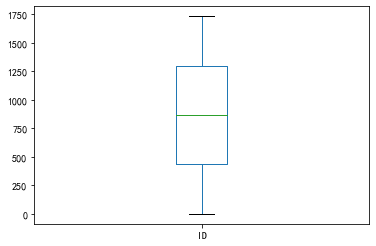

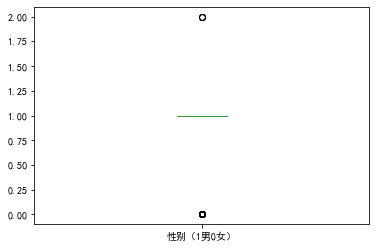

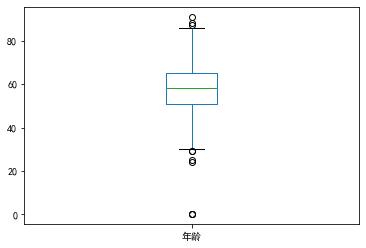

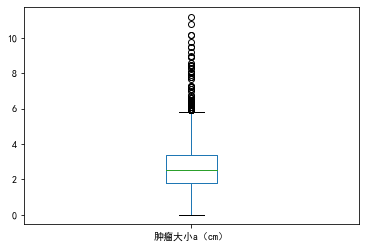

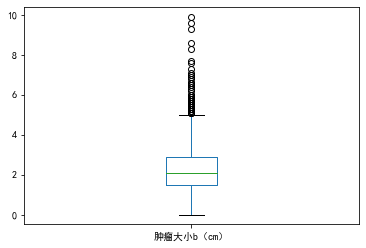

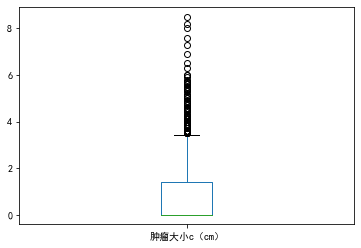

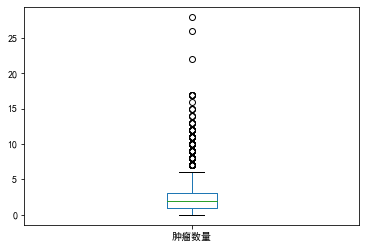

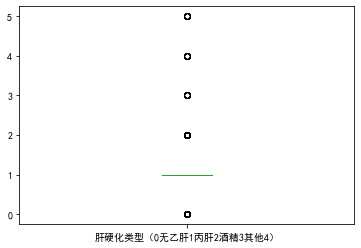

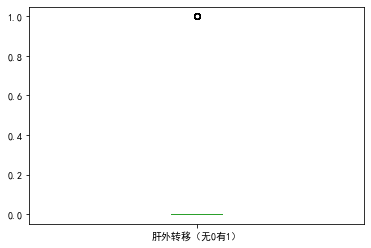

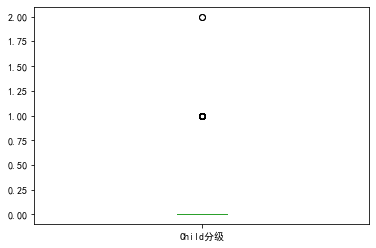

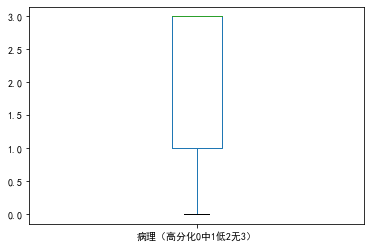

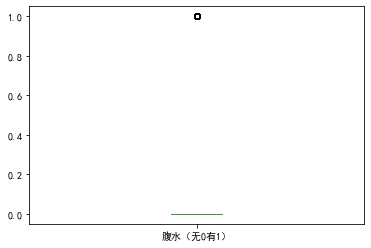

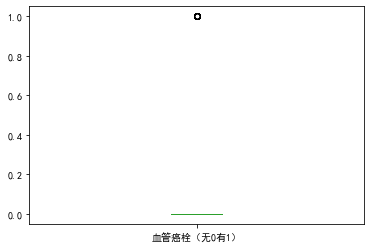

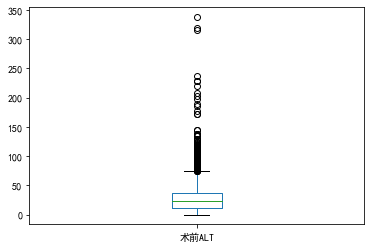

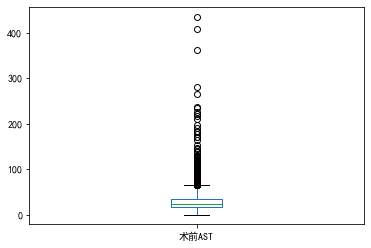

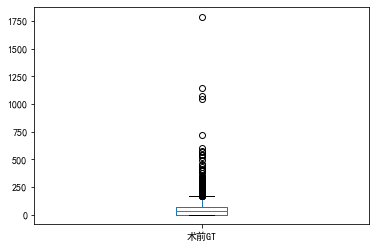

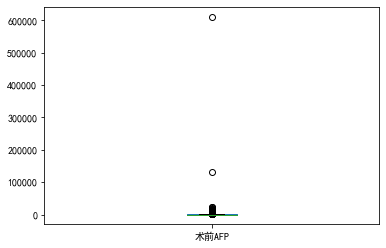

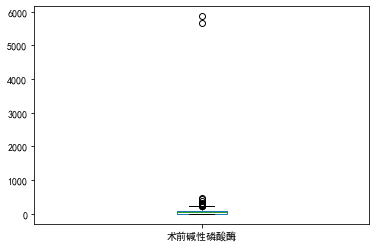

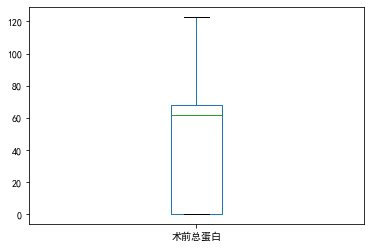

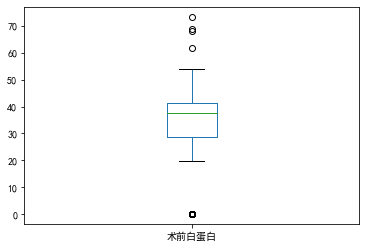

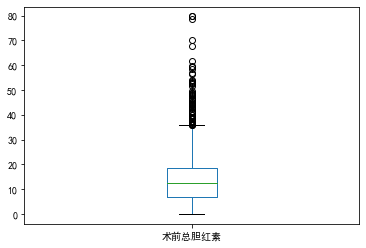

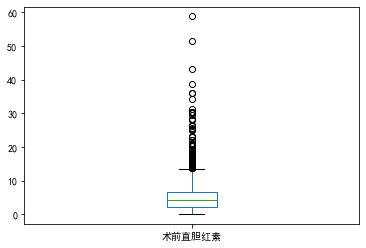

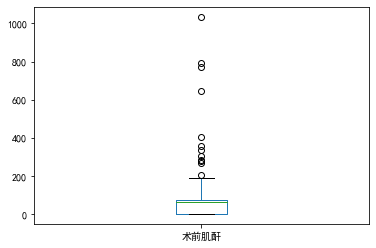

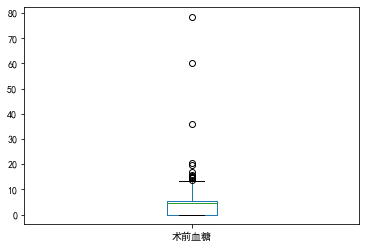

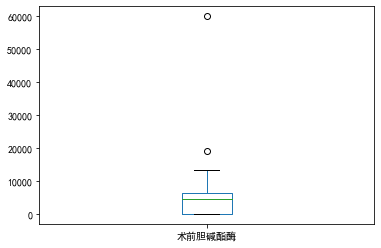

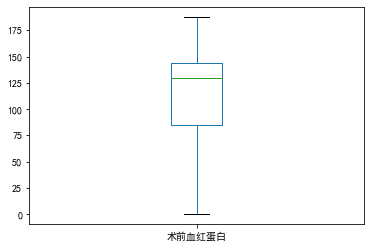

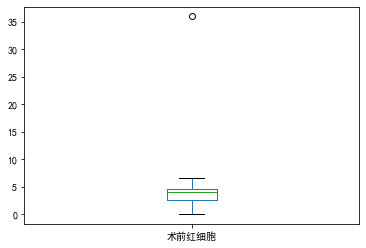

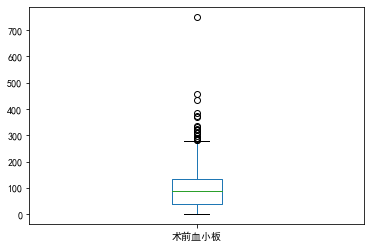

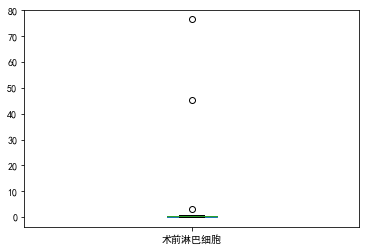

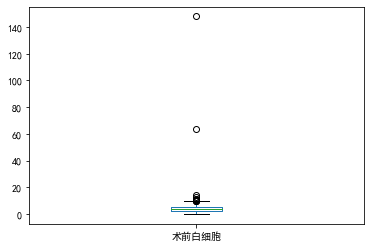

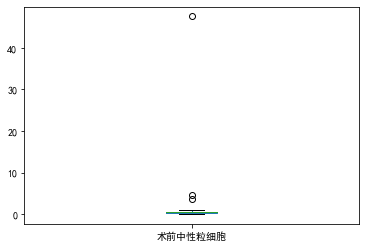

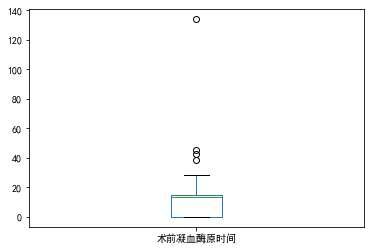

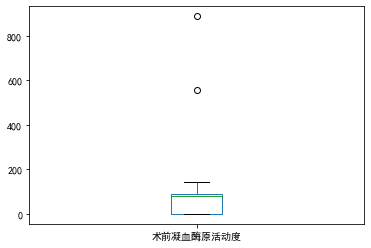

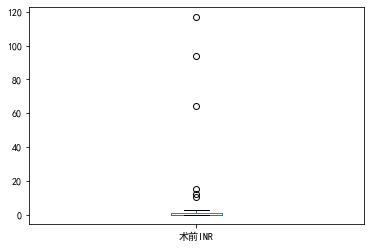

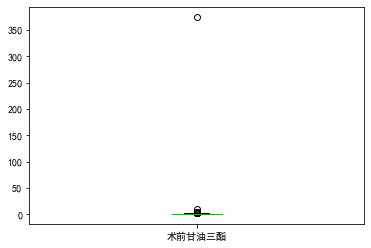

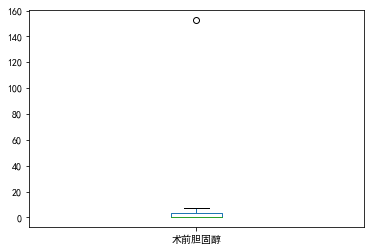

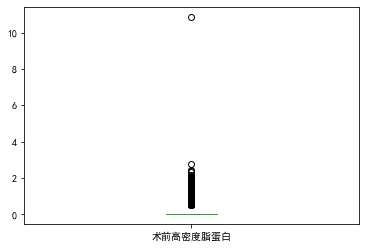

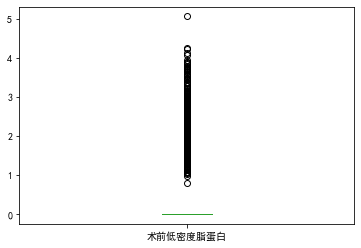

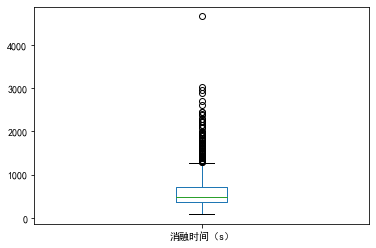

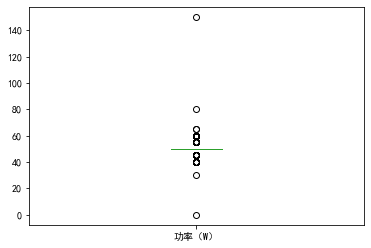

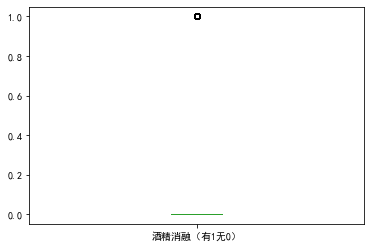

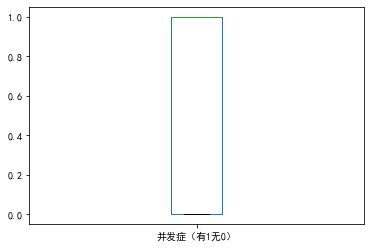

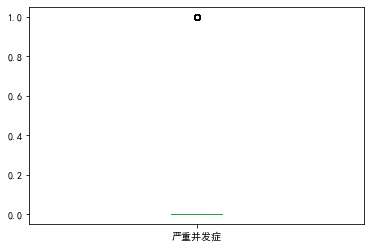

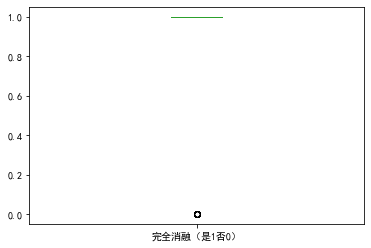

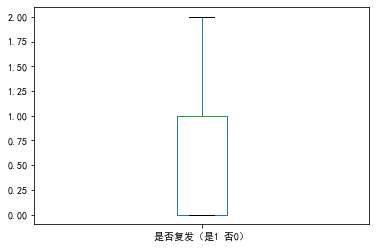

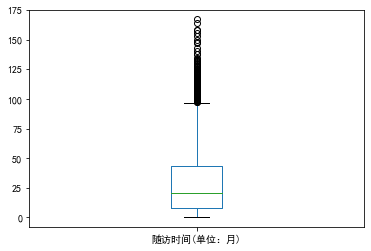

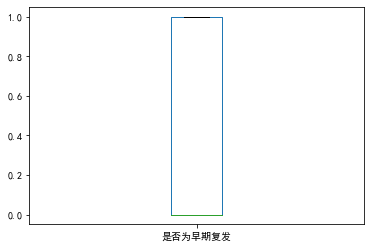

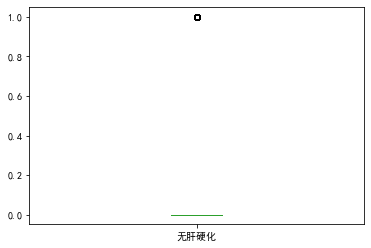

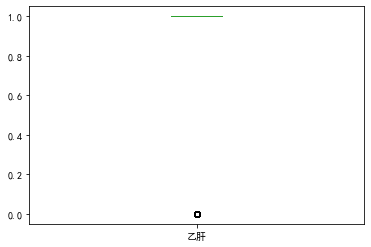

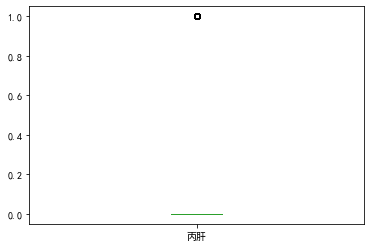

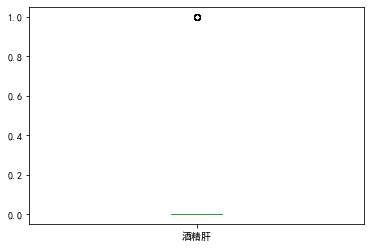

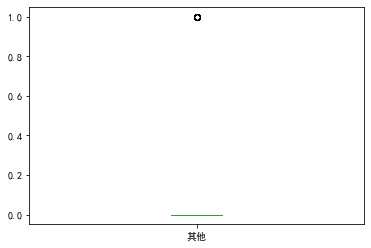

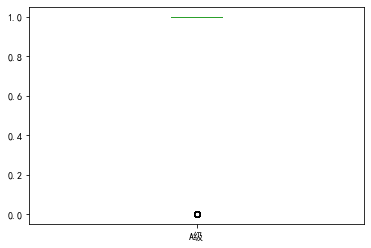

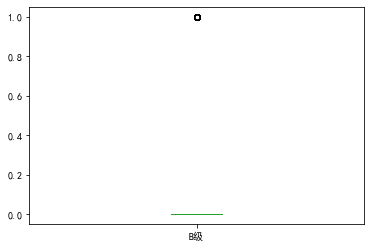

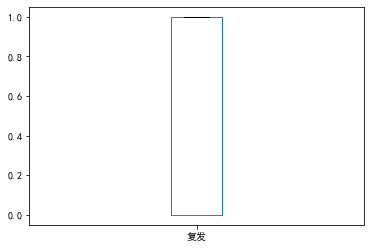

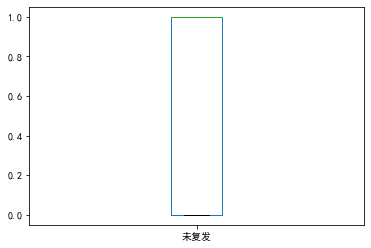

In [21]:
dataShape = cancerData.shape
for i in range(dataShape[1]):
    cancerData.iloc[:,i].plot.box()
    plt.savefig(str(i)+'.pdf')
    plt.show()

## Checking Existence of Inconsistency

In [22]:
cancerData.head(10)

,ID,性别（1男0女）,年龄,肿瘤大小a（cm）,肿瘤大小b（cm）,肿瘤大小c（cm）,肿瘤数量,肝硬化类型（0无乙肝1丙肝2酒精3其他4）,肝外转移（无0有1）,Child分级,...,是否为早期复发,无肝硬化,乙肝,丙肝,酒精肝,其他,A级,B级,复发,未复发
0,1.0,1,39.0,2.5,2.2,0.0,3.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,1,0,0,1
1,2.0,1,58.0,4.0,2.3,0.0,2.0,1.0,0.0,0.0,...,1.0,0,1,0,0,0,1,0,0,1
2,3.0,1,47.0,2.5,2.1,0.0,4.0,0.0,1.0,0.0,...,1.0,1,0,0,0,0,1,0,0,1
3,4.0,1,53.0,3.4,3.2,0.0,28.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,1,0,0,1
4,5.0,0,46.0,3.6,2.9,0.0,1.0,1.0,0.0,1.0,...,0.0,0,1,0,0,0,0,1,1,0
5,6.0,1,53.0,2.4,2.1,0.0,1.0,1.0,0.0,1.0,...,0.0,0,1,0,0,0,0,1,0,1
6,7.0,1,65.0,6.2,3.9,0.0,1.0,1.0,0.0,1.0,...,1.0,0,1,0,0,0,0,1,0,1
7,8.0,1,58.0,3.5,3.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,1,0,0,0,1,0,0,1
8,9.0,1,39.0,1.9,1.8,0.0,3.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,1,0,0,1
9,10.0,1,39.0,1.9,1.9,0.0,2.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,1,0,0,1


In [23]:
temp = cancerData['是否复发（是1 否0）'] - cancerData['是否为早期复发']
idx = temp>=0
sum(idx)

1733

## Data Normalization

In [24]:
cancerData.drop(columns = ['ID','Child分级','是否复发（是1 否0）','肝硬化类型（0无乙肝1丙肝2酒精3其他4）'],inplace = True)
cancerData

,性别（1男0女）,年龄,肿瘤大小a（cm）,肿瘤大小b（cm）,肿瘤大小c（cm）,肿瘤数量,肝外转移（无0有1）,病理（高分化0中1低2无3）,腹水（无0有1）,血管癌栓（无0有1）,...,是否为早期复发,无肝硬化,乙肝,丙肝,酒精肝,其他,A级,B级,复发,未复发
0,1,39.0,2.5,2.2,0.0,3.0,0.0,3.0,0.0,0.0,...,0.0,0,1,0,0,0,1,0,0,1
1,1,58.0,4.0,2.3,0.0,2.0,0.0,3.0,0.0,0.0,...,1.0,0,1,0,0,0,1,0,0,1
2,1,47.0,2.5,2.1,0.0,4.0,1.0,3.0,0.0,0.0,...,1.0,1,0,0,0,0,1,0,0,1
3,1,53.0,3.4,3.2,0.0,28.0,0.0,3.0,0.0,0.0,...,1.0,1,0,0,0,0,1,0,0,1
4,0,46.0,3.6,2.9,0.0,1.0,0.0,3.0,0.0,1.0,...,0.0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1,72.0,4.7,4.1,3.8,3.0,0.0,1.0,0.0,0.0,...,1.0,0,0,1,0,0,1,0,0,1
1729,1,37.0,1.7,1.5,0.0,1.0,0.0,3.0,0.0,0.0,...,1.0,1,0,0,0,0,1,0,0,1
1730,1,50.0,4.9,4.5,4.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0,1,0,0,0,1,0,1,0
1731,0,69.0,1.8,1.5,0.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0,1,0,0,0,1,0,1,0


In [25]:
cancerDataNorm = (cancerData-cancerData.mean())/cancerData.std()
cancerDataNorm['无肝硬化'] = cancerData['无肝硬化']
cancerDataNorm['乙肝'] = cancerData['乙肝']
cancerDataNorm['丙肝'] = cancerData['丙肝']
cancerDataNorm['酒精肝'] = cancerData['酒精肝']
cancerDataNorm['其他'] = cancerData['其他']
cancerDataNorm['复发'] = cancerData['复发']
cancerDataNorm['未复发'] = cancerData['未复发']
cancerDataNorm['A级'] = cancerData['A级']
cancerDataNorm['B级'] = cancerData['B级']

## Data Reduction

## PCA

In [26]:
pca = PCA(n_components=0.95)
cancerDataNormPCA = pca.fit_transform(cancerDataNorm.iloc[:,:-3])

In [27]:
cancerDataNormPCA[1]

array([ 2.09836294,  0.59857393, -1.35652982,  1.17823806,  0.94160592,
        0.42815156,  0.00792018,  0.65275088, -0.811939  , -0.84075466,
       -0.44407492,  0.43140319, -0.14927764, -0.03187053, -0.26339179,
        0.45004481, -0.1660596 , -0.2179424 , -0.7397993 , -0.05899655,
       -0.14412371, -0.26530457,  0.32857869, -0.82316616, -1.28281276,
        0.6694167 , -0.81622488, -0.63970225,  0.31535633, -0.33404163,
        0.16739933,  0.20123288,  0.21548854,  0.25897378, -0.11403227])

# Model Training and Prediction

## Logistic Regression

In [28]:
X = cancerDataNormPCA
y = cancerDataNorm.iloc[:,-1]

In [34]:
lrClassifier = LogisticRegression(penalty = 'none')
kf = KFold(n_splits=5)
acc = list()
auc = list()
for train_index,test_index in kf.split(X):
    
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    train_length = len(y_train)
    if train_length >= 2*sum(y_train):
        smo = SMOTE(sampling_strategy = {1:train_length-sum(y_train)},random_state = 100)
    else:
        smo = SMOTE(sampling_strategy = {0:sum(y_train)},random_state = 100)
    X_smo,y_smo = smo.fit_sample(X_train,y_train)
    lrClassifier.fit(X_smo,y_smo)
    y_pred = lrClassifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
np.mean(acc),np.mean(auc)

(0.8799636854291949, 0.8853902961277396)

## SVM

In [35]:
from sklearn import svm

In [36]:
SVMClassifier=svm.SVC(kernel='rbf',gamma=0.02,decision_function_shape='ovo',C=0.6)
kf = KFold(n_splits=5)
acc = list()
auc = list()
for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    train_length = len(y_train)
    if train_length >= 2*sum(y_train):
        smo = SMOTE(sampling_strategy = {1:train_length-sum(y_train)},random_state = 100)
    else:
        smo = SMOTE(sampling_strategy = {0:sum(y_train)},random_state = 100)
    X_smo,y_smo = smo.fit_sample(X_train,y_train)
    SVMClassifier.fit(X_smo,y_smo)
    y_pred = SVMClassifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
np.mean(acc),np.mean(auc)

(0.8741999966683881, 0.88293021903856)

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DClassifier=DecisionTreeClassifier()
kf = KFold(n_splits=5)
acc = list()
auc = list()
for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    train_length = len(y_train)
    if train_length >= 2*sum(y_train):
        smo = SMOTE(sampling_strategy = {1:train_length-sum(y_train)},random_state = 100)
    else:
        smo = SMOTE(sampling_strategy = {0:sum(y_train)},random_state = 100)
    X_smo,y_smo = smo.fit_sample(X_train,y_train)
    DClassifier.fit(X_smo,y_smo)
    y_pred = DClassifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
np.mean(acc),np.mean(auc)

(0.7939731138911561, 0.7933386862694529)

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RFClassifier=RandomForestClassifier()
kf = KFold(n_splits=5)
acc = list()
auc = list()
for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    train_length = len(y_train)
    if train_length >= 2*sum(y_train):
        smo = SMOTE(sampling_strategy = {1:train_length-sum(y_train)},random_state = 100)
    else:
        smo = SMOTE(sampling_strategy = {0:sum(y_train)},random_state = 100)
    X_smo,y_smo = smo.fit_sample(X_train,y_train)
    RFClassifier.fit(X_smo,y_smo)
    y_pred = RFClassifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
np.mean(acc),np.mean(auc)

(0.8649631023970947, 0.8741501588309312)

# Perceptron

In [41]:
from sklearn.linear_model import Perceptron

In [42]:
PClassifier=Perceptron(max_iter = 1000, tol = None)
kf = KFold(n_splits=5)
acc = list()
auc = list()
for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    train_length = len(y_train)
    if train_length >= 2*sum(y_train):
        smo = SMOTE(sampling_strategy = {1:train_length-sum(y_train)},random_state = 100)
    else:
        smo = SMOTE(sampling_strategy = {0:sum(y_train)},random_state = 100)
    X_smo,y_smo = smo.fit_sample(X_train,y_train)
    PClassifier.fit(X_smo,y_smo)
    y_pred = PClassifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
np.mean(acc),np.mean(auc)

(0.825700054971598, 0.8196599705092924)